In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
Measurementcolumns = inspector.get_columns('measurement')
print('measurement columns:')
for column in Measurementcolumns:
    print(column["name"], column["type"])

measurement columns:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector.get_table_names()
Stationtcolumns = inspector.get_columns('station')
print('station columns:')
for column in Stationtcolumns:
    print(column["name"], column["type"])

station columns:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
FirstMeasurementRow = session.query(Measurement).first()
FirstMeasurmentDict = FirstMeasurementRow.__dict__
s=(FirstMeasurmentDict['date'])
year = s[0:4]
month = s[5:7]
day = s[8:]
fulldate = year+month+day
a = dt.date(int(year),int(month),int(day))
print(a, type(a))


# #print's today's date:
# print (dt.date.today())

2010-01-01 <class 'datetime.date'>


In [13]:
FirstStationRow = session.query(Station).first()
FirstStationRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fafe9587f0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [14]:
FirstMeasurmentDict

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fafe958710>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [15]:
for row in session.query(Station.id, Station.name).limit(9).all():
    print(row)

(1, 'WAIKIKI 717.2, HI US')
(2, 'KANEOHE 838.1, HI US')
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(4, 'PEARL CITY, HI US')
(5, 'UPPER WAHIAWA 874.3, HI US')
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US')
(7, 'WAIHEE 837.5, HI US')
(8, 'HONOLULU OBSERVATORY 702.2, HI US')
(9, 'MANOA LYON ARBO 785.2, HI US')


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
p=[]
for row in session.query(Measurement.date).all():
    p.append(row)
# for StringDate in p:
a = p[-12:]
print("Last 12 dates:")
for item in a:
    for item2 in item:
        print(item2)

Last 12 dates:
2017-08-12
2017-08-13
2017-08-14
2017-08-15
2017-08-16
2017-08-17
2017-08-18
2017-08-19
2017-08-20
2017-08-21
2017-08-22
2017-08-23


In [17]:
# Calculate the date 1 year ago from the last data point in the database
final_date = session.query(Measurement.date).all()
a=final_date[-1][0]
type(a)
year = a[0:4]
month = a[5:7]
day = a[8:]
fulldate = year+month+day
b = dt.date(int(year),int(month),int(day))
result = b.year-1 
result2 =dt.date(result, b.month, b.day)
result2

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data (date??) and precipitation scores
precepi1 = session.query(Measurement.prcp, Measurement.date).all()
precepi1[:]

[(0.08, '2010-01-01'),
 (0.0, '2010-01-02'),
 (0.0, '2010-01-03'),
 (0.0, '2010-01-04'),
 (None, '2010-01-06'),
 (0.06, '2010-01-07'),
 (0.0, '2010-01-08'),
 (0.0, '2010-01-09'),
 (0.0, '2010-01-10'),
 (0.01, '2010-01-11'),
 (0.0, '2010-01-12'),
 (0.0, '2010-01-14'),
 (0.0, '2010-01-15'),
 (0.0, '2010-01-16'),
 (0.0, '2010-01-17'),
 (0.0, '2010-01-18'),
 (0.0, '2010-01-19'),
 (0.0, '2010-01-20'),
 (0.0, '2010-01-21'),
 (0.0, '2010-01-22'),
 (0.0, '2010-01-23'),
 (0.01, '2010-01-24'),
 (0.0, '2010-01-25'),
 (0.04, '2010-01-26'),
 (0.12, '2010-01-27'),
 (0.0, '2010-01-28'),
 (None, '2010-01-30'),
 (0.03, '2010-01-31'),
 (0.01, '2010-02-01'),
 (None, '2010-02-03'),
 (0.01, '2010-02-04'),
 (0.0, '2010-02-05'),
 (0.0, '2010-02-06'),
 (0.0, '2010-02-07'),
 (0.0, '2010-02-08'),
 (0.0, '2010-02-09'),
 (0.0, '2010-02-11'),
 (0.02, '2010-02-12'),
 (0.01, '2010-02-13'),
 (0.0, '2010-02-14'),
 (0.0, '2010-02-15'),
 (0.0, '2010-02-16'),
 (0.0, '2010-02-17'),
 (None, '2010-02-19'),
 (0.03, '2010-02-

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(precepi1)
df1.set_index("date", inplace=True)
df1.rename(columns = {"prcp":"precipitation"}, inplace=True)

In [20]:
# Sort the dataframe by date
df1 = df1.sort_values("date")
df1

,precipitation
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


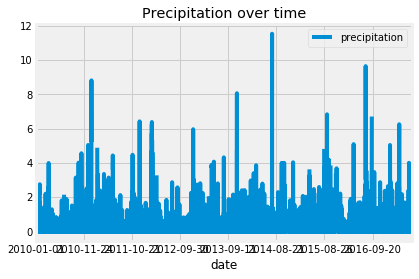

In [21]:
aaa= df1.plot(title= "Precipitation over time", grid = True, legend = True)

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()
#Mine are different for some reason??

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [24]:
# Design a query to show how many stations are available in this dataset?
StationCount = session.query(Station.name).count()
StationCount

9

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# from sqlalchemy import func
# from sqlalchemy import distinct
# mostActive = session.query(func.count(Measurement.station)).\
#         group_by(distinct(Measurement.station))
r = engine.execute('Select station,Count(station) As num FROM Measurement GROUP BY station order by num desc').fetchall()
r
#from sqlalchemy.sql import text
#session.execute('SELECT * FROM Measurement.station')
    
#for i in rs:
#    print(i)
# mostActive.all()

# for row in mostActive:
#     print(row)#mostActive
#counts={}
#for item in mostActive:
#    if item not in counts:
#        counts[item] =0
        #print(counts[item])
#    else:
#        counts[item] +=1
#counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
engine.table_names()

['measurement', 'station']

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowestTemp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temps=[]
for item in lowestTemp:
    temps.append((list(item)[0]))
print("The max temp at the most active station, USC00519281, is "+str(max(temps)))

The max temp at the most active station, USC00519281, is 85.0


In [28]:
print("The min temp at the most active station, USC00519281, is "+str(min(temps)))

The min temp at the most active station, USC00519281, is 54.0


In [29]:
sum = 0
for item in temps:
    sum += item
sum
avg1 = sum / len(temps)
avg1
print("The average temp at the most active station, USC00519281, is "+str(avg1))

The average temp at the most active station, USC00519281, is 71.66378066378067


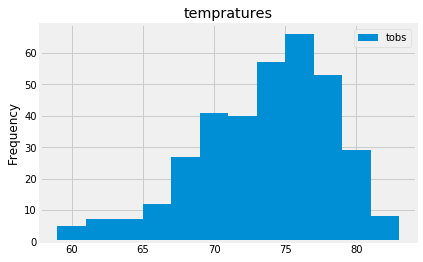

In [30]:
# # Choose the station with the highest number of temperature observations.
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
import matplotlib.pyplot as plt
previous_year=dt.date(2017,8,23)-dt.timedelta(days=365)
data2 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date>=previous_year).all()
#data2

df3 = pd.DataFrame(data2, columns=['tobs'])
df3.head()
df3.plot.hist(bins=12, title='tempratures')



# # mammals = session.query(NA).filter(NA.genus == 'Antilocapra').all()
# # for mammal in mammals:
# #     print("Family: {0}, Genus: {1}".format(mammal.family, mammal.genus))

# result = engine.execute("select * from users")
# for u in session.query(User).instances(result):
#     print u

#result = engine.execute("""select * from Measurement where station = "USC00519281" """).all()
#for u in result:
   # print(u)

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
answer = calc_temps('2014-02-21', '2014-03-02')
answer = answer[0]

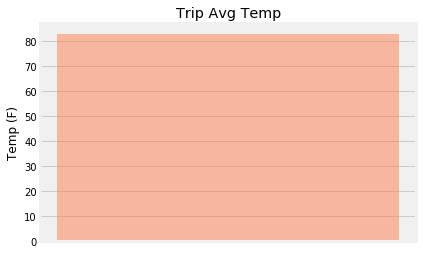

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
yerr = answer[0]-answer[0]
bar  = ax.bar(1, answer[2], yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(1), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)");

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2014-02-21'
end_date = '2014-03-02'


results = session.query(Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.57), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.3), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.1099999999999999), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.97), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.8700000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.73), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.5), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.03), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.0)]


## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [38]:
# Plot the daily normals as an area plot with `stacked=False`
